In [ ]:
import pandas as pd
import env

url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/employees'  
pd.read_sql('SELECT * FROM departments', url)

In [2]:
# for viz
import matplotlib.pyplot as plt
# for statistics
from scipy import stats
# for numerical data:
import numpy as np

#### 1. A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.

What is the probability that no cars drive up in the noon hour?  

In [3]:
# what do i need to define a poisson distribution?
# I have my one metric of 2 cars on average per window of 1 hour
λ = 2 # The one hour window is contextual through our understanding
cars_dist = stats.poisson(λ)

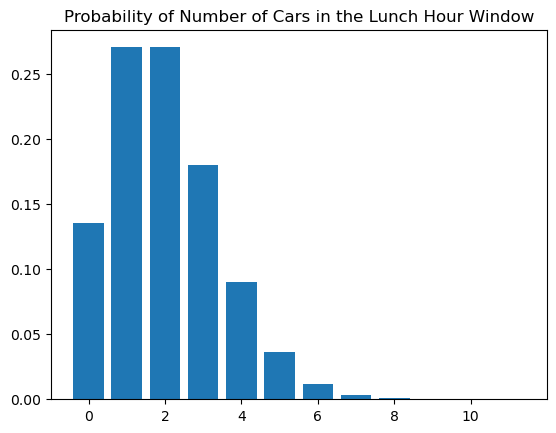

In [6]:
# how make a chart?
# make a domain? 0 - 11
# make a range? PMF: the probability of any given instance happening
xs = range(12)
ys = [cars_dist.pmf(x) for x in xs]
plt.bar(xs, ys)
plt.title('Probability of Number of Cars in the Lunch Hour Window')
plt.show()

In [7]:
# i have my dist set up and I want to answer:
# probability of zero cars showing up in the noon hour?
# what can I use to figure this out?
# looking for an exact value, PMF!
cars_dist.pmf(0)

0.1353352832366127

In [8]:
# what about zero or less?
cars_dist.cdf(0)

0.1353352832366127

In [9]:
# what about the possibility of every thing
# minus the possibility of 1 or more?
1 - cars_dist.sf(0)

0.1353352832366127

#### 2. Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:

- What grade point average is required to be in the top 5% of the graduating class?  
- What GPA constitutes the bottom 15% of the class?  
- An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?  
- If I have a GPA of 3.5, what percentile am I in?

In [14]:
# one thing at a time:
# make the distribution
μ = 3.0
σ = 0.3
grades_dist = stats.norm(μ, σ)

In [16]:
# what gpa to be in the top 5%?
# top 5 % -> count from right side and use inverse survival
round(grades_dist.isf(0.05), 2)

3.49

In [21]:
round(grades_dist.ppf(0.95), 2)

3.49

In [18]:
# what gpa is the bottom 15% threshold?

In [19]:
# bottom 15%, same as the top 85%?

In [22]:
round(grades_dist.ppf(0.15), 2)

2.69

An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?  

1st decile: 0-10 percentile  
2nd decile: 10-20 percentile   
3rd decile: 20-30 percentile

In [23]:
grades_dist.ppf(0.2)

2.7475136299281258

In [24]:
grades_dist.ppf(0.3)

2.842679846187588

In [25]:
lower_fence, upper_fence = grades_dist.ppf([0.2,0.3])

In [26]:
lower_fence, upper_fence

(2.7475136299281258, 2.842679846187588)

In [27]:
candidate_grade = 2.8

In [28]:
lower_fence < candidate_grade < upper_fence

True

If I have a GPA of 3.5, what percentile am I in?

In [31]:
round(grades_dist.cdf(3.5), 2) # from the left side

0.95

In [32]:
round(grades_dist.sf(3.5), 2) # right the right side,
# we are in the top ~4.7% of our class

0.05

#### 3. A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 click-throughs. How likely is it that this many people or more click through?

In [34]:
# what type of distribution?
# click-though rate:
# rate of success: 0.02
# trials: 4326
# 97 or more clickthroughs: survival function!

clicks_dist = stats.binom(4326, 0.02)
# under this distribution, my odds of getting 97 or more clickthroughs?
round(clicks_dist.sf(96), 2)

0.14

In [ ]:
# about a 14 % chance of that happening

In [35]:
# if we thought about this in terms of a poisson, we could:
# lambda: probability of success over that specific window
# lambda = 0.02 * 4326

#### 4. You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the hundreths place. Looking to save time, you put down random probabilities as the answer to each question.

- What is the probability that at least one of your first 60 answers is correct?

In [38]:
# 100 questions on the homework
# answers are all probabilities to the 100th place
# question: prob that that we get at least one out of first 60 correct?
prob_success = 1 / 101
num_trials = 60
homework_dist = stats.binom(num_trials, prob_success)
# survival for any amount over zero:
round(homework_dist.sf(0), 2)

0.45

#### 5. The codeup staff tends to get upset when the student break area is not cleaned up. Suppose that there's a 3% chance that any one student cleans the break area when they visit it, and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area. How likely is it that the break area gets cleaned up each day? How likely is it that it goes two days without getting cleaned up? All week?

In [44]:
# set-up:
# success rate: 3%
# number of trials: how many trials:
# 0.9 * 3 * 22
prob_success = 0.03
num_trials  = int(0.9 * 3 * 22) # no partial people allowed at codeup

In [45]:
cleaning_dist = stats.binom(num_trials, prob_success)

In [46]:
round(cleaning_dist.sf(0), 2)

0.83

In [49]:
(0.9 * 3 * 22) * 2 -> 119

118.80000000000001

In [47]:
# if we want to know two days, lets expand that number of trials
# that hanging decimal was 0.4, so we'll account for that 0.8 by
# adding one to my doubled integer
stats.binom(((num_trials * 2) + 1), prob_success).pmf(0)

0.026658541032798848

In [51]:
# all week?
# new_trial number:
num_trials = round((0.9 * 3 * 22) * 5, 0)
cleaning_dist = stats.binom(num_trials, prob_success)

In [52]:
cleaning_dist.pmf(0)

0.00011781621791055051

#### 6. You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. After several weeks of careful observation, you notice that the average number of people in line when your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class? Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.

In [53]:
# avg number of people in line is 15
# standard deviation of 3
# two minutes for each person to order
# ten minutews from ordering to gettig food,
# negligible commute time
# what are the odds that we have 15 minutes left to eat?

In [54]:
# convert people into minutes of time they take from lunch hour:
# we want to know how much time we have, so lets think about
# those people in terms of time
μ = 15 * 2
σ = 3 * 2

In [56]:
line_dist = stats.norm(μ, σ)

In [57]:
# time for lunch:
# itll take *me* two minutes to order just like everyone else
# I need 15 minutes to eat as well
# ten minutes to get my order
60 - (15 + 10 + 2) # lunch hour minus eat time, minus order time, minus wait time

33

In [59]:
# we want the prob of the line taking 33 minutes or less
# after all the constant factors that we subtracted
round(line_dist.cdf(33), 2)

0.69

#### 7. Connect to the employees database and find the average salary of current employees, along with the standard deviation. For the following questions, calculate the answer based on modeling the employees salaries with a normal distribution defined by the calculated mean and standard deviation then compare this answer to the actual values present in the salaries dataset.

What percent of employees earn less than 60,000?  
What percent of employees earn more than 95,000?  
What percent of employees earn between 65,000 and 80,000?  
What do the top 5% of employees make?

In [60]:
from env import user, password, host

In [62]:
import pandas as pd

In [63]:
# we want to connect to the db, and makea request
# my query:
# 
query = '''
SELECT * FROM salaries s WHERE s.to_date > NOW()
'''
connection = f'mysql+pymysql://{user}:{password}@{host}/employees'

# try reading that into pandas:
df = pd.read_sql(query, connection)

In [64]:
df.head()

,emp_no,salary,from_date,to_date
0,10001,88958,2002-06-22,9999-01-01
1,10002,72527,2001-08-02,9999-01-01
2,10003,43311,2001-12-01,9999-01-01
3,10004,74057,2001-11-27,9999-01-01
4,10005,94692,2001-09-09,9999-01-01


In [66]:
# lets rip out the std and mean from the salaries here:
sal_stats = df.salary.agg(['mean', 'std'])

In [68]:
sal_stats.values

array([72012.23585731, 17309.99538025])

In [69]:
# we can use the star to unpack positional args
# from an iterable in the right order
#  ** will unpack kwargs from a dictionary
salary_dist = stats.norm(*sal_stats.values)

What percent of employees earn less than 60,000?  

In [71]:
# prob of being less than 60k?
round(salary_dist.cdf(60_000), 2)

0.24

What percent of employees earn more than 95,000?  

In [72]:
# prob of earning more than 95k?
round(salary_dist.sf(95_000), 2)

0.09

What percent of employees earn between 65,000 and 80,000? 

In [73]:
# cumulative probability of the higher salary,
# cumulative probability of the lower salary
# get the difference, get the range between the two in terms of
# percentage.
high_sal, lower_sal = salary_dist.cdf([80_000, 65_000])
salary_bracket = high_sal - lower_sal

In [80]:
round(salary_bracket, 2)

0.34

What do the top 5% of employees make?

In [76]:
# top 5%?
# 0.05 from the top,
# have a prob, looking for a value:
# inverse survival
salary_dist.isf(0.05)

100484.64454102777

In [77]:
salary_dist.ppf(0.95)

100484.64454102775

In [2]:
# for viz
import matplotlib.pyplot as plt
# for statistics
from scipy import stats
# for numerical data:
import numpy as np

#### 1. A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.

What is the probability that no cars drive up in the noon hour?  

In [3]:
# what do i need to define a poisson distribution?
# I have my one metric of 2 cars on average per window of 1 hour
λ = 2 # The one hour window is contextual through our understanding
cars_dist = stats.poisson(λ)

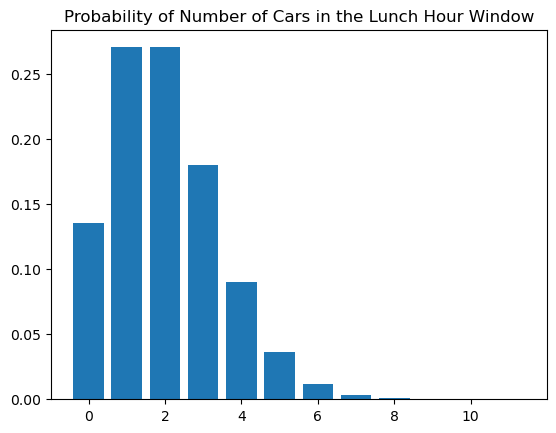

In [6]:
# how make a chart?
# make a domain? 0 - 11
# make a range? PMF: the probability of any given instance happening
xs = range(12)
ys = [cars_dist.pmf(x) for x in xs]
plt.bar(xs, ys)
plt.title('Probability of Number of Cars in the Lunch Hour Window')
plt.show()

In [7]:
# i have my dist set up and I want to answer:
# probability of zero cars showing up in the noon hour?
# what can I use to figure this out?
# looking for an exact value, PMF!
cars_dist.pmf(0)

0.1353352832366127

In [8]:
# what about zero or less?
cars_dist.cdf(0)

0.1353352832366127

In [9]:
# what about the possibility of every thing
# minus the possibility of 1 or more?
1 - cars_dist.sf(0)

0.1353352832366127

#### 2. Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:

- What grade point average is required to be in the top 5% of the graduating class?  
- What GPA constitutes the bottom 15% of the class?  
- An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?  
- If I have a GPA of 3.5, what percentile am I in?

In [14]:
# one thing at a time:
# make the distribution
μ = 3.0
σ = 0.3
grades_dist = stats.norm(μ, σ)

In [16]:
# what gpa to be in the top 5%?
# top 5 % -> count from right side and use inverse survival
round(grades_dist.isf(0.05), 2)

3.49

In [21]:
round(grades_dist.ppf(0.95), 2)

3.49

In [18]:
# what gpa is the bottom 15% threshold?

In [19]:
# bottom 15%, same as the top 85%?

In [22]:
round(grades_dist.ppf(0.15), 2)

2.69

An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?  

1st decile: 0-10 percentile  
2nd decile: 10-20 percentile   
3rd decile: 20-30 percentile

In [23]:
grades_dist.ppf(0.2)

2.7475136299281258

In [24]:
grades_dist.ppf(0.3)

2.842679846187588

In [25]:
lower_fence, upper_fence = grades_dist.ppf([0.2,0.3])

In [26]:
lower_fence, upper_fence

(2.7475136299281258, 2.842679846187588)

In [27]:
candidate_grade = 2.8

In [28]:
lower_fence < candidate_grade < upper_fence

True

If I have a GPA of 3.5, what percentile am I in?

In [31]:
round(grades_dist.cdf(3.5), 2) # from the left side

0.95

In [32]:
round(grades_dist.sf(3.5), 2) # right the right side,
# we are in the top ~4.7% of our class

0.05

#### 3. A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 click-throughs. How likely is it that this many people or more click through?

In [34]:
# what type of distribution?
# click-though rate:
# rate of success: 0.02
# trials: 4326
# 97 or more clickthroughs: survival function!

clicks_dist = stats.binom(4326, 0.02)
# under this distribution, my odds of getting 97 or more clickthroughs?
round(clicks_dist.sf(96), 2)

0.14

In [ ]:
# about a 14 % chance of that happening

In [35]:
# if we thought about this in terms of a poisson, we could:
# lambda: probability of success over that specific window
# lambda = 0.02 * 4326

#### 4. You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the hundreths place. Looking to save time, you put down random probabilities as the answer to each question.

- What is the probability that at least one of your first 60 answers is correct?

In [38]:
# 100 questions on the homework
# answers are all probabilities to the 100th place
# question: prob that that we get at least one out of first 60 correct?
prob_success = 1 / 101
num_trials = 60
homework_dist = stats.binom(num_trials, prob_success)
# survival for any amount over zero:
round(homework_dist.sf(0), 2)

0.45

#### 5. The codeup staff tends to get upset when the student break area is not cleaned up. Suppose that there's a 3% chance that any one student cleans the break area when they visit it, and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area. How likely is it that the break area gets cleaned up each day? How likely is it that it goes two days without getting cleaned up? All week?

In [44]:
# set-up:
# success rate: 3%
# number of trials: how many trials:
# 0.9 * 3 * 22
prob_success = 0.03
num_trials  = int(0.9 * 3 * 22) # no partial people allowed at codeup

In [45]:
cleaning_dist = stats.binom(num_trials, prob_success)

In [46]:
round(cleaning_dist.sf(0), 2)

0.83

In [49]:
(0.9 * 3 * 22) * 2 -> 119

118.80000000000001

In [47]:
# if we want to know two days, lets expand that number of trials
# that hanging decimal was 0.4, so we'll account for that 0.8 by
# adding one to my doubled integer
stats.binom(((num_trials * 2) + 1), prob_success).pmf(0)

0.026658541032798848

In [51]:
# all week?
# new_trial number:
num_trials = round((0.9 * 3 * 22) * 5, 0)
cleaning_dist = stats.binom(num_trials, prob_success)

In [52]:
cleaning_dist.pmf(0)

0.00011781621791055051

#### 6. You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. After several weeks of careful observation, you notice that the average number of people in line when your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class? Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.

In [53]:
# avg number of people in line is 15
# standard deviation of 3
# two minutes for each person to order
# ten minutews from ordering to gettig food,
# negligible commute time
# what are the odds that we have 15 minutes left to eat?

In [54]:
# convert people into minutes of time they take from lunch hour:
# we want to know how much time we have, so lets think about
# those people in terms of time
μ = 15 * 2
σ = 3 * 2

In [56]:
line_dist = stats.norm(μ, σ)

In [57]:
# time for lunch:
# itll take *me* two minutes to order just like everyone else
# I need 15 minutes to eat as well
# ten minutes to get my order
60 - (15 + 10 + 2) # lunch hour minus eat time, minus order time, minus wait time

33

In [59]:
# we want the prob of the line taking 33 minutes or less
# after all the constant factors that we subtracted
round(line_dist.cdf(33), 2)

0.69

#### 7. Connect to the employees database and find the average salary of current employees, along with the standard deviation. For the following questions, calculate the answer based on modeling the employees salaries with a normal distribution defined by the calculated mean and standard deviation then compare this answer to the actual values present in the salaries dataset.

What percent of employees earn less than 60,000?  
What percent of employees earn more than 95,000?  
What percent of employees earn between 65,000 and 80,000?  
What do the top 5% of employees make?

In [60]:
from env import user, password, host

In [62]:
import pandas as pd

In [63]:
# we want to connect to the db, and makea request
# my query:
# 
query = '''
SELECT * FROM salaries s WHERE s.to_date > NOW()
'''
connection = f'mysql+pymysql://{user}:{password}@{host}/employees'

# try reading that into pandas:
df = pd.read_sql(query, connection)

In [64]:
df.head()

,emp_no,salary,from_date,to_date
0,10001,88958,2002-06-22,9999-01-01
1,10002,72527,2001-08-02,9999-01-01
2,10003,43311,2001-12-01,9999-01-01
3,10004,74057,2001-11-27,9999-01-01
4,10005,94692,2001-09-09,9999-01-01


In [66]:
# lets rip out the std and mean from the salaries here:
sal_stats = df.salary.agg(['mean', 'std'])

In [68]:
sal_stats.values

array([72012.23585731, 17309.99538025])

In [69]:
# we can use the star to unpack positional args
# from an iterable in the right order
#  ** will unpack kwargs from a dictionary
salary_dist = stats.norm(*sal_stats.values)

What percent of employees earn less than 60,000?  

In [71]:
# prob of being less than 60k?
round(salary_dist.cdf(60_000), 2)

0.24

What percent of employees earn more than 95,000?  

In [72]:
# prob of earning more than 95k?
round(salary_dist.sf(95_000), 2)

0.09

What percent of employees earn between 65,000 and 80,000? 

In [73]:
# cumulative probability of the higher salary,
# cumulative probability of the lower salary
# get the difference, get the range between the two in terms of
# percentage.
high_sal, lower_sal = salary_dist.cdf([80_000, 65_000])
salary_bracket = high_sal - lower_sal

In [80]:
round(salary_bracket, 2)

0.34

What do the top 5% of employees make?

In [76]:
# top 5%?
# 0.05 from the top,
# have a prob, looking for a value:
# inverse survival
salary_dist.isf(0.05)

100484.64454102777

In [77]:
salary_dist.ppf(0.95)

100484.64454102775